# Root Finding Algorithms

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Root finding algorithms
    - Bisection method
    - Newton's method
    - Errors
- `scipy` implementation
    - Finding root of scalar functions by [`scipy.optimize.root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)

As iterative methods, tolerance is set as a stopping criteria. The stopping criteria could be $f(x_k) < \mathrm{tolerance}$, or it could also be $|x_{k+1} - x_k| < \mathrm{tolerance}$.

## Bisection method

Goal: Given an internal $[a, b]$, find *a* root of $f(x)$ in the interval.

Intermediate value theorem states that for continuous functions, if $f(a)$ and $f(b)$ have opposite signs, then there is some $x$ between $a$ and $b$ such that $f(x) = 0$.

Let midpoint be $x=m$.

- If $f(m)$ and $f(a)$ have opposite signs, then change the new interval to $[a, m]$.
- If $f(m)$ and $f(b)$ have opposite signs, then change the new interval to $[m, b]$.

### Implementation

**Problem Statement.** Find the root of the function

$$
f(x) = x^3 + 5x^2 - 2x - 2
$$

using bisection method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def bisection(f, left, right, tolerance=1e-6, max_iter=10000):
    '''
    Find a root of given function in an interval using bisection method.
    
    :param f: objective function
    :param left: lower bound of interval
    :param right: upper bound of interval
    :param tolerance: tolerance of stopping criteria
    :param max_iter: maximum iteration allowed for calculation
    :returns: root of objective function
    '''
    f_mid = tolerance * 2  # arbitrary number greater than tolerance
    i = 0  # iteration counter
    
    # bisection method logic
    while abs(f_mid) > tolerance and i < max_iter:
        mid = (left + right) / 2
        f_mid = f(mid)
        if f_mid == 0.0:
            return mid
        elif f_mid * f(left) < 0:  # check sign change
            right = mid
        elif f_mid * f(right) < 0:
            left = mid
        else:
            raise ValueError('f(a) and f(b) must have different signs')
        i += 1
    
    # maximum iteration warning
    if i == max_iter:
        import warnings
        warnings.warn(f'Maximum iteration reached. Current stopping criteria is {abs(f_mid) :.2e}', UserWarning)
    
    return mid

In [3]:
def test_func(x):
    return x**3 + 5*x**2 - 2*x - 2

print(bisection(test_func, -2, 2))

-0.4797694683074951


## Newton's method
Goal: Find a root of a function $f(x)$ given an initial guess.

Using tangent line approximation, we have

$$
y - f(x_k) = f'(x_k)(x - x_k)
$$

Newton's method uses the root of the tangent line approximation as the next guess ($y=0$), so we have

$$
\begin{aligned}
- f(x_k) &= f'(x_k)(x - x_k) \\
x - x_k &= -\dfrac{f(x_k)}{f'(x_k)} \\
x &= x_k - \dfrac{f(x_k)}{f'(x_k)}
\end{aligned}
$$

Therefore, the formula for Newton's method is

$$
x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}
$$

### Implementation

**Problem Statement.** Find the root of the function

$$
f(x) = x^3 + 5x^2 - 2x - 2
$$

using Newton's method.

In [4]:
def newton(f, df, x0, tolerance=1e-6, max_iter=10000):
    '''
    Find a root of given function using Newton's method with an initial guess.
    
    :param f: objective function
    :param df: derivative of target function
    :param x0: initial guess of root
    :param tolerance: tolerance of stopping criteria
    :param max_iter: maximum iteration allowed for calculation
    :returns: root of objective function
    '''
    i = 0  # iteration counter
    x = x0
    
    # newton's method logic
    while abs(f(x)) > tolerance and i < max_iter:
        x = x - f(x) / df(x)
        i += 1
    
    # maximum iteration warning
    if i == max_iter:
        import warnings
        warnings.warn(f'Maximum iteration reached. Current stopping criteria is {abs(f(x)) :.2e}', UserWarning)
    
    return x

In [5]:
def test_func(x):
    return x**3 + 5*x**2 - 2*x - 2

def test_func_derivative(x):
    return 3*x**2 + 10*x - 2

In [6]:
newton(test_func, test_func_derivative, 10)

0.7856670111986841

## Root finding using `scipy.optimize.root_scalar()`
[`scipy.optimize.root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html) can take various methods, each with their required input parameters.

In [7]:
from scipy.optimize import root_scalar

In [8]:
def test_func(x):
    return x**3 + 5*x**2 - 2*x - 2

def test_func_derivative(x):
    return 3*x**2 + 10*x - 2

In [9]:
# bisection method
root_scalar(test_func, bracket=[0, 1], method='bisect')

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 0.7856670111996209

In [10]:
# newton's method
root_scalar(test_func, x0=0, fprime=test_func_derivative, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: -0.4797694818645718

In [11]:
# brent’s method
root_scalar(test_func, bracket=[0, 3], method='brentq')

      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.7856670111980021

## Assessing errors of root finding algorithms

**Problem Statement.** Consider the function 

$$
f(x) = x^5 - 3x^4 + 5x^3 - 7x^2 + 6x - 2.
$$

1. Calculate an "exact" solution using `scipy.optimize`'s Newton's method and initial guess of $x_0 = 0$.
2. Find the root of $f(x)$ using bisection method with interval of $[-100, 100]$ and a tolerance of $10^{-8}$. Calculate the error at each step.
3. Find the root of $f(x)$ using Newton's method with an initial guess of $x_0 = 100$ and a tolerance of $10^{-8}$. Calculate the error at each step.
4. Plot and compare the errors of bisection and Newton's method.

In [12]:
## problem 1
def f(x):
    return x**5 - 3*x**4 + 5*x**3 - 7*x**2 + 6*x - 2

def df(x):
    return 5*x**4 - 12*x**3 + 15*x**2 - 14*x + 6

x0 = 100
exact = root_scalar(f, x0=100, fprime=df, method='newton').root
print(f'The "exact" solution is {exact}')

The "exact" solution is 1.0000089368806895


In [13]:
## problem 2 - bisection method
mids = []
bisection_errors = []

left = -100
right = 100
tolerance = 1e-8
max_iter = 1000
f_mid = tolerance * 2  # arbitrary number greater than tolerance
i = 0  # iteration counter

# bisection method logic
while abs(f_mid) > tolerance and i < max_iter:
    mids.append((left + right) / 2)    
    f_mid = f(mids[i])
    bisection_errors.append(abs(exact - mids[i]))
    if f_mid == 0.0:
        break
    elif f_mid * f(left) < 0:  # check sign change
        right = mids[i]
    elif f_mid * f(right) < 0:
        left = mids[i]
    else:
        raise ValueError('f(a) and f(b) must have different signs')
    i += 1

mids[-1]

1.0009765625

In [14]:
## problem 3 - newton's method
x = [100]
newton_errors = [abs(exact - x[0])]
i = 0  # iteration counter

# newton's method logic
while abs(f(x[i])) > tolerance and i < max_iter:
    x.append(x[i] - f(x[i]) / df(x[i]))
    newton_errors.append(abs(exact - x[i+1]))
    i += 1
x[-1]

1.0014079515589658

In [15]:
## probelm 4
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    'savefig.dpi': 300,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

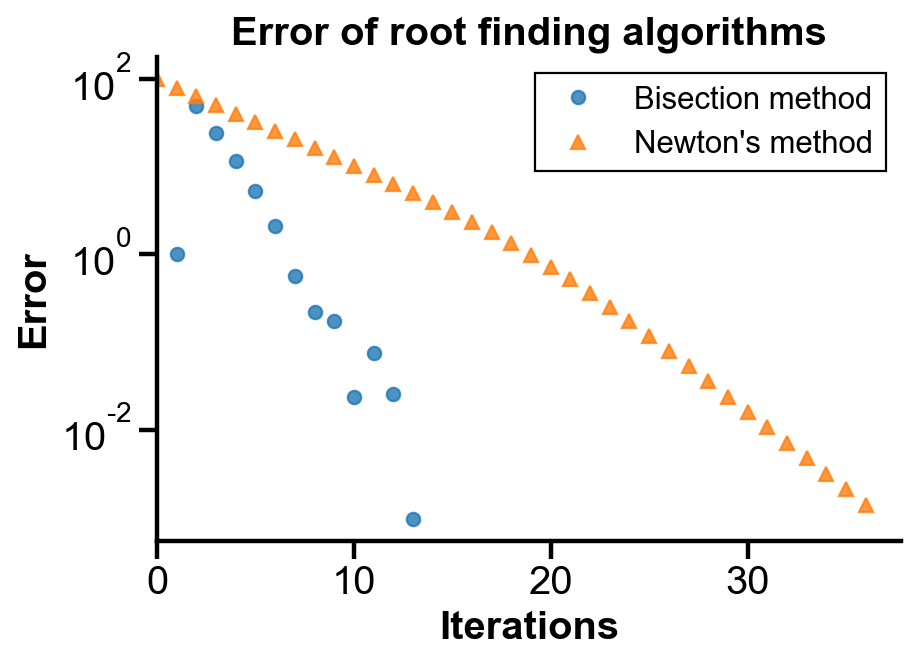

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.semilogy(np.arange(1, len(bisection_errors)+1), bisection_errors, 'o', label='Bisection method', alpha=0.8)
ax.semilogy(np.arange(len(newton_errors)), newton_errors, '^', label="Newton's method", alpha=0.8)
ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
ax.set_title('Error of root finding algorithms')
ax.set_xlim(0)
ax.legend()

**Comment.** In this case, bisection method converges more rapidly than Newton's method, as shown in the steeper negative slope. The trend is not universal: it depends on the function, initial guess, and given interval. generally, Newton's method is faster than bisection if proper initial guess is chosen. However, Newton's method may be slow when the derivative of the function is zero at the root. It would also just doesn't work if the function is ill-conditioned. Also, analytical expression of derivative is needed for Newton's method.